In [4]:
import pandas as pd
import numpy as np
import seaborn as sb

import matplotlib.pyplot as plt

# matplotlib image size and resolution
mpl_options = {"figsize":(10,10)}
sb.set(rc={'figure.figsize':(12,8)})

from inspect import signature as sig

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import cv2

### Загрузим датасет и возьмем только 2 фичи

In [5]:
from sklearn import datasets

FEATURE_NAMES = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns = FEATURE_NAMES)
y = iris.target

XX = X[['Petal Length','Sepal Length']]

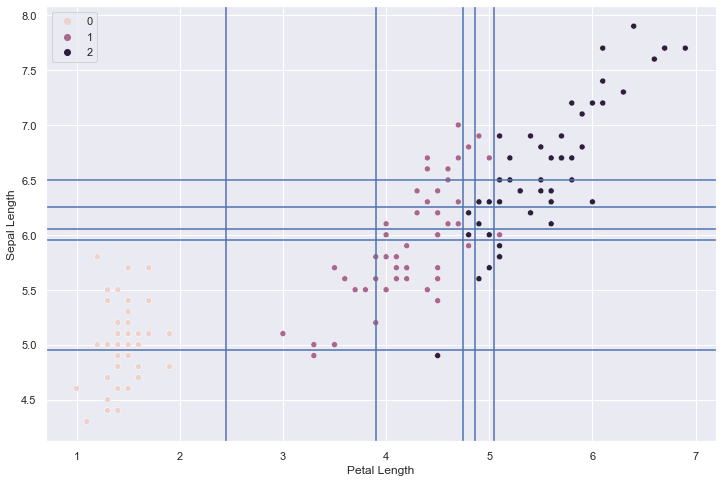

In [6]:
def show(XX, y):
    sb.scatterplot(x = 'Petal Length', y = 'Sepal Length', data = XX, hue = y)

    plt.axvline(x=2.45)
    plt.axvline(x=4.75)
    plt.axvline(x=5.05)
    plt.axhline(y=4.95)
    plt.axhline(y=6.5)
    plt.axhline(y=6.05)
    plt.axvline(x=3.9)
    plt.axvline(x=4.86)
    plt.axhline(y=6.25)
    plt.axhline(y=5.95)
    
show(XX, y)

### Итак, что такое случайный лес? (random forest)
- каждое дерево растет из своего сэмпла (bagging) примерно 50% данных
- каждое дерево имеет случайное подмножество переменных (для ускорения)
- каждое дерево независимо предсказывает класс
- каждое дерево независимо выбирает важные характеристики
- деревья голосуют совместно
- это совместное голосование и есть основной результат случайного леса

### Почему было сделано именно так? Я не знаю, кто то попробовал, всем понравилось.

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=3, verbose=1, n_jobs=16, random_state = 42, n_estimators=10000)
fit = model.fit(XX, y)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.6s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    1.0s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    1.6s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    2.3s
[Parallel(n_jobs=16)]: Done 2418 tasks      | elapsed:    3.1s
[Parallel(n_jobs=16)]: Done 3168 tasks      | elapsed:    4.1s
[Parallel(n_jobs=16)]: Done 4018 tasks      | elapsed:    5.2s
[Parallel(n_jobs=16)]: Done 4968 tasks      | elapsed:    6.4s
[Parallel(n_jobs=16)]: Done 6018 tasks      | elapsed:    7.7s
[Parallel(n_jobs=16)]: Done 7168 tasks      | elapsed:    9.2s
[Parallel(n_jobs=16)]: Done 8418 tasks      | elapsed:   10.8s
[Parallel(n_jobs=16)]: Done 9768 tasks      | elapsed:   12.5s
[Parallel(n_jobs=16)]: Done 10000 out of

In [30]:
sig(RandomForestClassifier)

<Signature (n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)>

In [26]:
print(fit.predict([[1, 1]]))

[0]


In [27]:
print(fit.feature_importances_)

[0.60280198 0.39719802]


### Teперь проверим как лес справляется с нашей задачей

In [28]:
def draw(XX, model):
    points = np.random.randint(100,800,size=(10000,2))/100
    answers = model.predict(points).reshape(10000,1)
    stack = np.hstack((points, answers))

    s0 = np.array([i[:2] for i in stack  if i[2] == 0])
    s1 = np.array([i[:2] for i in stack  if i[2] == 1])
    s2 = np.array([i[:2] for i in stack  if i[2] == 2])

    sb.scatterplot(x = 'Petal Length', y = 'Sepal Length', data = XX, hue = y)

    plt.axvline(x=2.45)
    plt.axvline(x=4.75)
    plt.axvline(x=5.05)
    plt.axhline(y=4.95)
    plt.axhline(y=6.5)
    plt.axhline(y=6.05)
    plt.axvline(x=3.9)
    plt.axvline(x=4.86)
    plt.axhline(y=6.25)
    plt.axhline(y=5.95)

    plt.scatter(s0[:,0], s0[:,1] , color = 'orange', s = 3)
    plt.scatter(s1[:,0], s1[:,1] , color = 'red', s = 3)
    plt.scatter(s2[:,0], s2[:,1] , color = 'blue', s = 3)

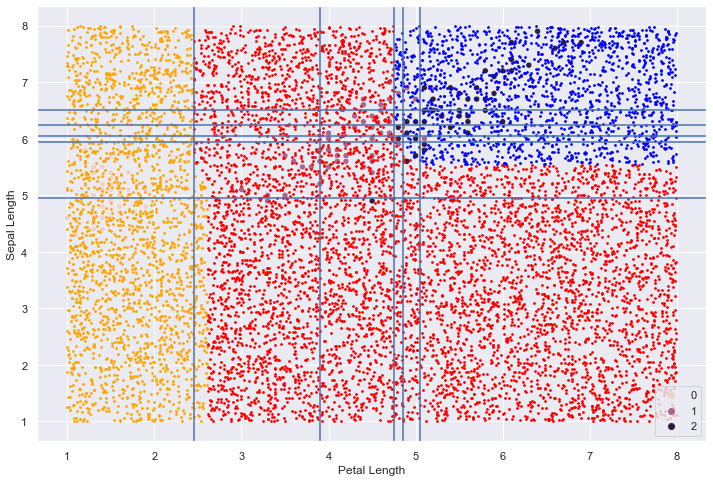

In [29]:
draw(XX, model)